# Optical Pumping - Standard Analysis

For our experimental physics class project, we conducted an experiment to study optical pumping and
understand the basic quantum mechanics involved in single electron atomic transitions. We used a
Rubidium sample and light source to study the intensity of light absorbed by the sample while it’s
being optically pumped and then depumped. Several depumping methods were investigated such
as applying a net zero-field on the sample and applying an RF signal. We were able to use curvefitting
algorithms to measure the Lande-g factors of Rubidium isotopes using a couple of methods
and compare them to their expected theoretical values.

This script does three things:
1. It takes in simple voltage and current data to calibrate our oscilloscope.

2. It analyzes raw data for our optical pumping signals by converting the voltage signals (to current values and then) to magnetic field values and fits our data to the expected functions.

3. It plots our findings on the relation between Magnetic Field and the Energy of RF Photons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Calibrating Oscilloscope voltage and current
filename = 'voltage_current_data.csv'
with open(filename) as file:
    Lines = file.readlines() # All lines in the file
    voltage = Lines[0].split(",")
    current = Lines[1].split(",")
    err_current = Lines[2].split(",") # uncertainty in current values

# Convert data to float    
for l in range(len(voltage)):
    voltage[l] = float(voltage[l])
    current[l] = float(current[l])
    err_current[l] = float(err_current[l])

# Define function for the fit    
def fitFunc(x, K, C):
    y = K * x + C
    return y
    
parameters, covariance = curve_fit(fitFunc, voltage, current, sigma=err_current)

# Fit parameters and their uncertainties
fit_K = parameters[0]
fit_C = parameters[1]

err_K = np.sqrt(np.diag(covariance))[0]
err_C = np.sqrt(np.diag(covariance))[1]

print(fit_K,fit_C)

0.032428001702560015 0.48508086692201846


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
# Initialize empty lists for values of frequency and voltages
freq = []
v1 = []
v2 = []
v3 = []
v4 = []
v5 = []
err = []

h = 6.626 * 10**(-34) # Planck constant

def B(i):
    # Function to calculate magnetic field based on current using Helmholtz equation
    y = (4/5)**(3/2) * ((4*np.pi*10**(-7) * 11)/0.164084) * i
    y = y * 10**4
    return y

# Iterate over file to extract frequency and voltage values
filename2 = 'rawData.csv'
with open(filename2) as file:
    Lines = file.readlines() # All lines in the file
    Lines = Lines[1:]
    for line in Lines:
        line = line.split(",")
        freq.append(float(line[0]))
        v1.append(float(line[1]))
        v2.append(float(line[2]))
        v3.append(float(line[3]))
        v4.append(float(line[4]))
        v5.append(float(line[5]))
        err.append(float(line[6])) # uncertainty in voltage

In [3]:
# Current Data for each curve
i2 = fitFunc(np.array(v2), fit_K, fit_C)
i4 = fitFunc(np.array(v4), fit_K, fit_C)
i5 = fitFunc(np.array(v5), fit_K, fit_C)

# Current Uncertainties
di1 = np.sqrt(((np.array(v1)*fit_K)**2 * ((np.array(err)**2 / np.array(v1)**2) + (err_K**2 / fit_K**2))) + err_C**2)
di2 = np.sqrt(((np.array(v2)*fit_K)**2 * ((np.array(err)**2 / np.array(v2)**2) + (err_K**2 / fit_K**2))) + err_C**2)
di4 = np.sqrt(((np.array(v4)*fit_K)**2 * ((np.array(err)**2 / np.array(v4)**2) + (err_K**2 / fit_K**2))) + err_C**2)
di5 = np.sqrt(((np.array(v5)*fit_K)**2 * ((np.array(err)**2 / np.array(v5)**2) + (err_K**2 / fit_K**2))) + err_C**2)

residual = B(0.433) # Earth's (and background) magnetic field

# Magnetic Field Data in units of Gauss
b1 = B(np.array(i1)) - residual
b2 = B(np.array(i2)) - residual
b4 = B(np.array(i4)) - residual
b5 = B(np.array(i5)) - residual

# Magnetic Field Uncertainties
db1 = abs(b1 * np.sqrt((di1**2 / i1**2) + (0.000254**2 / 0.164084**2)))
db2 = abs(b2 * np.sqrt((di2**2 / i2**2) + (0.000254**2 / 0.164084**2)))
db4 = abs(b4 * np.sqrt((di4**2 / i4**2) + (0.000254**2 / 0.164084**2)))
db5 = abs(b5 * np.sqrt((di5**2 / i5**2) + (0.000254**2 / 0.164084**2)))

# Range of RF Energies
dE = h * np.array(freq) * 10**3 * 6.242 * 10**18  # delta E in units of eV

# Fit data to find slopes and intercepts
p1, cov1 = np.polyfit(b1, dE, 1, cov=True)
p2, cov2 = np.polyfit(b2, dE, 1, cov=True)
p4, cov4 = np.polyfit(b4, dE, 1, cov=True)
p5, cov5 = np.polyfit(b5, dE, 1, cov=True)

muB = 5.7883 * 10**(-9) # Bohr magneton

# Lande-g factors
g1 = p1[0]/muB
g2 = p2[0]/muB
g4 = p4[0]/muB
g5 = p5[0]/muB

# Uncertainties in g
dg1 = np.sqrt(np.diag(cov1))[0]/muB
dg2 = np.sqrt(np.diag(cov2))[0]/muB
dg4 = np.sqrt(np.diag(cov4))[0]/muB
dg5 = np.sqrt(np.diag(cov5))[0]/muB

# Weights
w1 = 1/dg1**2
w2 = 1/dg2**2
w4 = 1/dg4**2
w5 = 1/dg5**2

# Weighted Average
G85 = (abs(w1*g1)+abs(w5*g5))/(w1+w5)
G87 = (abs(w2*g2)+abs(w4*g4))/(w2+w4)

# Uncertainty of weighted average
dG85 = 1/np.sqrt(w1+w5)
dG87 = 1/np.sqrt(w2+w4)

ratio = G87/G85
uncer = abs(ratio * np.sqrt((dG85**2 / G85**2) + (dG87**2 / G87**2)))
print("The theoretical value of the ratio between Rb-87 and Rb-85's g_f values is 1.5. Our measured value is", str(round(ratio,3)), '+-', str(round(uncer,3)))

The theoretical value of the ratio between Rb-87 and Rb-85's g_f values is 1.5. Our measured value is 1.518 +- 0.016


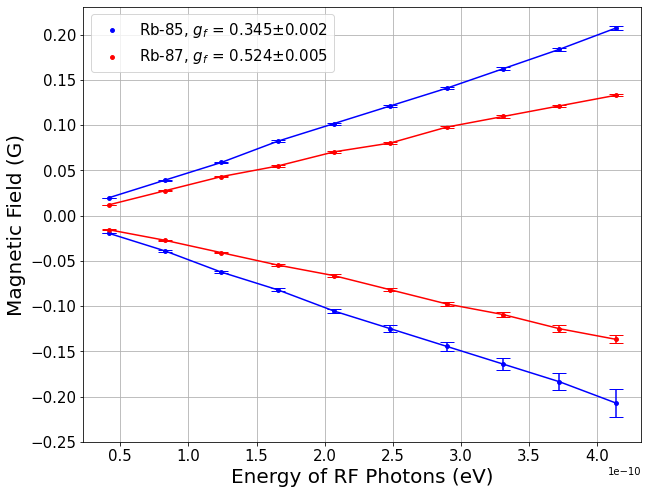

In [5]:
# Plot data 
plt.figure(figsize=(10,8))
plt.scatter(dE, b1, s=15, c='b', label='Rb-85, $g_f$ = ' + str(round(G85,3)) + '$ \pm $' + str(round(dG85,3)))
plt.scatter(dE, b2, s=15, c='r', label='Rb-87, $g_f$ = ' + str(round(G87,3)) + '$ \pm $' + str(round(dG87,3)))
plt.scatter(dE, b4, s=15, c='r')
plt.scatter(dE, b5, s=15, c='b')

plt.errorbar(dE, b1, yerr=db1, c='b', capsize=7)
plt.errorbar(dE, b2, yerr=db2, c='r', capsize=7)
plt.errorbar(dE, b4, yerr=db4, c='r', capsize=7)
plt.errorbar(dE, b5, yerr=db5, c='b', capsize=7)

plt.legend(fontsize=15)
plt.ylabel('Magnetic Field (G)', fontsize=20)
plt.xlabel('Energy of RF Photons (eV)', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(np.arange(-0.25, 0.25, step=0.05), fontsize=15)
plt.grid(True)
plt.savefig("Part1Plot.png")
plt.show()